#### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [1]:
import pandas as pd

df = pd.read_excel('flight_price.xlsx')
print('The dataset have (rows,columns)',df.shape)

The dataset have (rows,columns) (10683, 11)


#### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

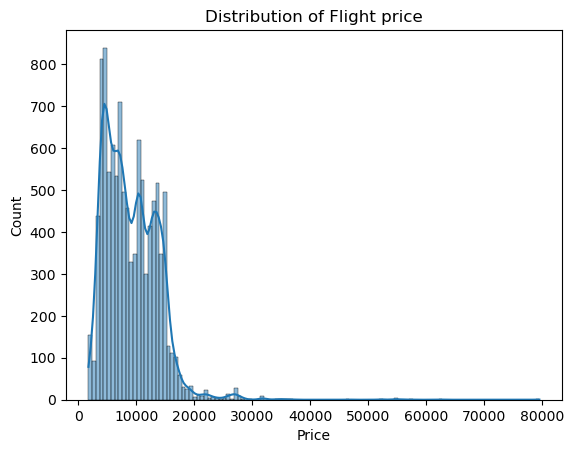

The distribution of flight price seems to be Right skewed.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Price'],kde=True)
plt.title('Distribution of Flight price')
plt.show()
print('The distribution of flight price seems to be Right skewed.')

#### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [16]:
df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

The price ranges from 1759 which in min. flight price to 79512 which is max. price.

#### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

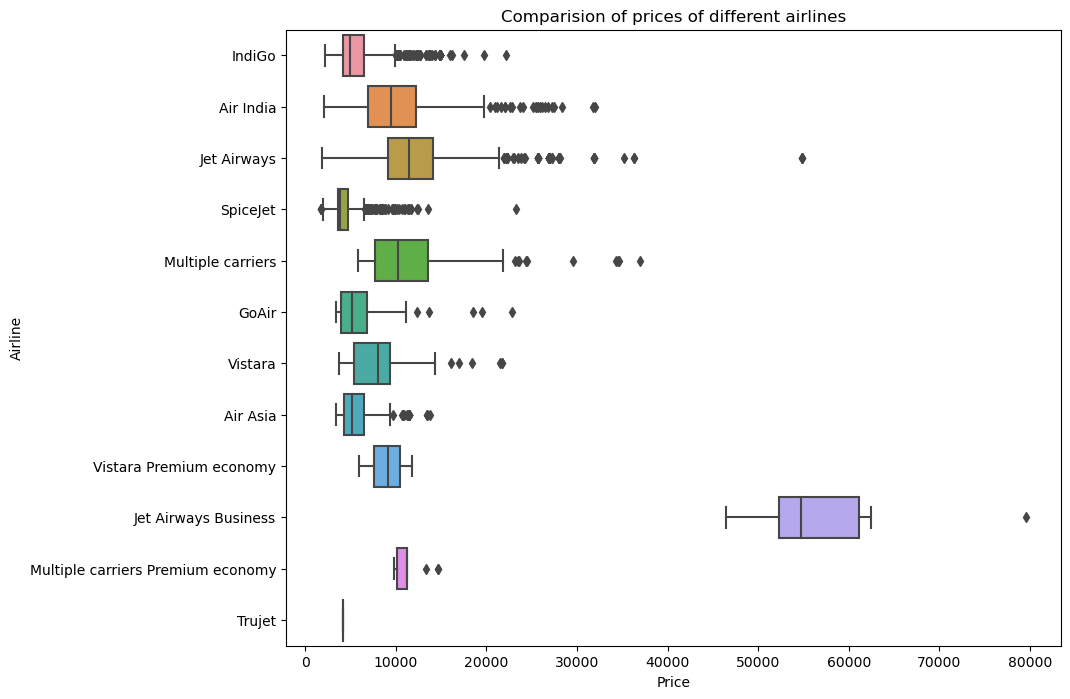

In [3]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Price',y='Airline',data=df )
plt.title('Comparision of prices of different airlines')
plt.show()

Jet Airways Business seem to have highest paying passenger, while other Airlines seem to have relatively low paying passenger and range between same price point except of some outliars as seen in the Boxplot.

#### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

As, Seen in the boxplot above, there are plenty of outliars in the dataset.

Outliers can significantly impact the analysis of a dataset. Here are some ways outliers can affect analysis:

1. Skew statistical measures - Outliers can skew the mean, median, and other statistical measures, making them inaccurate representations of the true distribution. This can mislead analysis that rely on these measures.

2. Impact modeling - Many machine learning and statistical models are sensitive to outliers. Outliers can impact the model fit and performance, reducing accuracy.

3. Obscure true patterns - The extreme values of outliers can obscure the true patterns and relationships in the underlying data, making it hard to identify meaningful features.

4. Increase variance - Outliers can significantly increase the variance of the data, impacting analyies that rely on low variance.

5. Impact visualizations - Outliers can distort visualizations like histograms, scatter plots, etc., making it hard to accurately interpret the data.


#### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

To identify the peak travel season from this dataset, I would do the following:

Analyze the number of flights by month - I would count the number of flights for each month in the Date_of_Journey column. The months with the highest number of flights likely correspond to peak travel season.

Analyze the average flight price by month - I would calculate the average flight price for each month. Higher average prices during certain months may indicate higher demand and peak season.

In [131]:
df['Day']=df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month']=df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Year']=df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [92]:
import numpy as np
a = [3, 4,5,6]
b=[]

for i in a:
    x = [j for idx, j in enumerate(df['Price']) if df['Month'][idx] == i]
    y=np.mean(x)
    b.append(y)

    # Print the extracted prices for each month
    print(f"Average for Month {i}: {y}")

Average for Month 3: 10673.20558002937
Average for Month 4: 5770.847080630213
Average for Month 5: 9127.24754760531
Average for Month 6: 8828.796133567663


### Findings

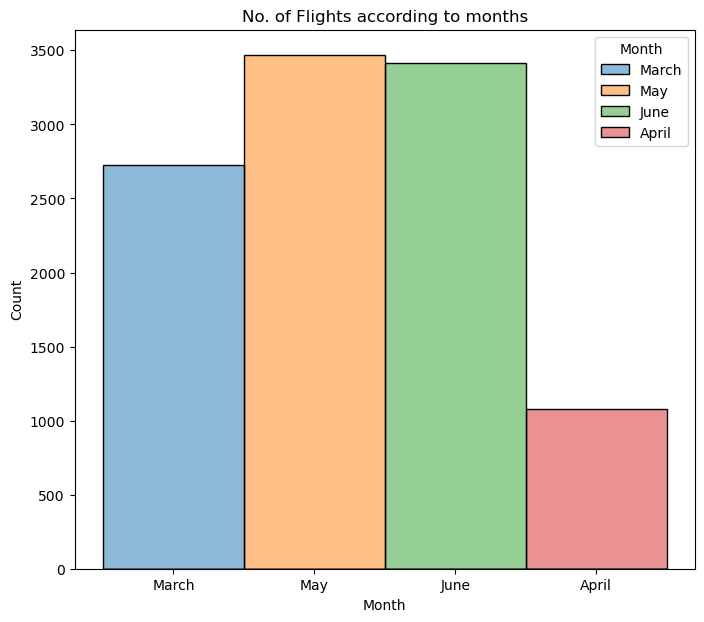

In [93]:
month_mapping = {3: 'March', 4: 'April', 5: 'May', 6: 'June'}

df['Month'] = df['Month'].map(month_mapping)

plt.figure(figsize=(8,7))
sns.histplot(x='Month',data=df,hue= 'Month')
plt.title('No. of Flights according to months')
plt.show()

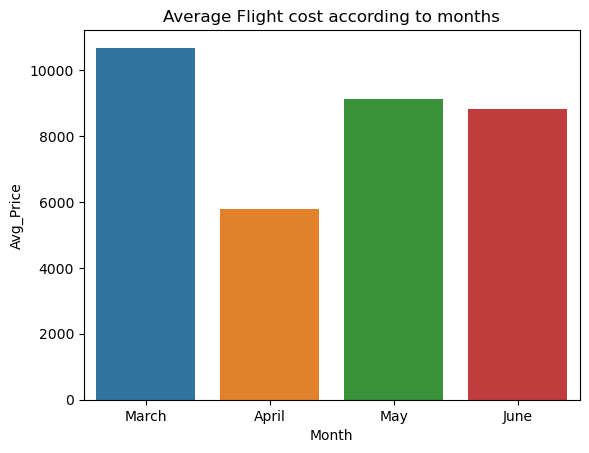

In [101]:

month_mapping=['March','April','May','June']
data = list(zip(b, month_mapping))

df1 = pd.DataFrame(data, columns=['Avg_Price', 'Month'])

sns.barplot(x='Month',y='Avg_Price',data=df1)
plt.title('Average Flight cost according to months')
plt.show()

From the above results, We can conclude that Peak season for the flights is May and June followed by March and April. However, The average flight price peaks in March followed by May, June and April.

#### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

I would analyze the average flight price by month - I would calculate the average flight price for each month this would give me the trend of the flight prices as I have done above.

Then I would Use Barplot to represent the Average Price of flights according to different months.

In [100]:
import numpy as np
a = [3, 4,5,6]
b=[]

for i in a:
    x = [j for idx, j in enumerate(df['Price']) if df['Month'][idx] == i]
    y=np.mean(x)
    b.append(y)

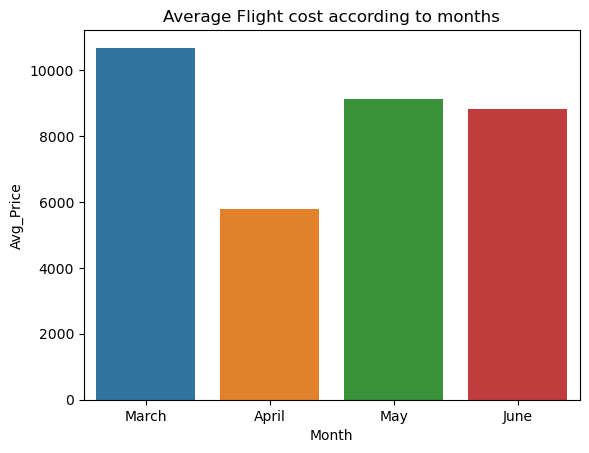

In [103]:
month_mapping=['March','April','May','June']
data = list(zip(b, month_mapping))

df1 = pd.DataFrame(data, columns=['Avg_Price', 'Month'])

sns.barplot(x='Month',y='Avg_Price',data=df1)
plt.title('Average Flight cost according to months')
plt.show()

The average flight price peaks in March followed by May, June and April.

#### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

I would analyze the following features from the dataset to identify factors that affect flight prices:

1. Airline - Different airlines tend to have different pricing strategies, so analyzing prices by airline can reveal significant differences.

2. Route - Longer routes and routes with more stops tend to have higher prices, so analyzing prices by route length and number of stops can show these effects. 

3. Departure time - Flights at more convenient times like early mornings and evenings tend to be more expensive.

4. Day of week - Weekend flights tend to be priced higher.

5. Time of year - Flights during peak travel seasons like holidays can be significantly more expensive.

I would present my findings to the management team in a report with:

- Visualizations like bar charts, scatter plots and histograms showing how prices vary by the different factors.

- Summary statistics like averages, standard deviations and quantiles of prices by group. 

- Key insights and conclusions on the factors with the largest impact on prices based on the analyses.

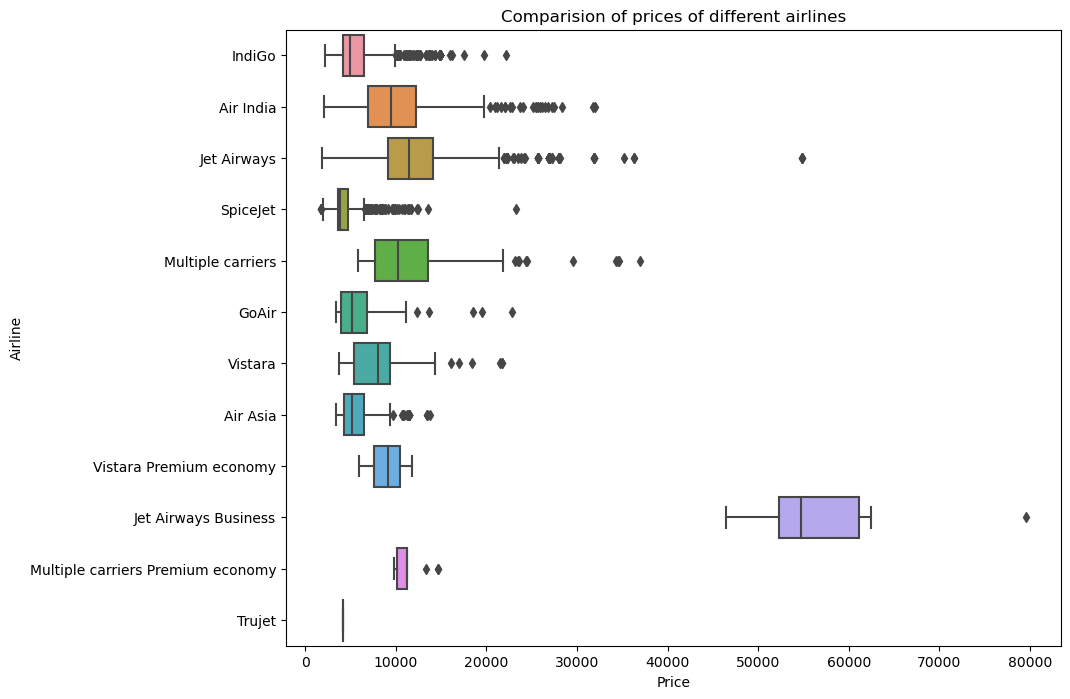

In [108]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Price',y='Airline',data=df )
plt.title('Comparision of prices of different airlines')
plt.show()

Insights:
- Airline do matter when it comes to the Price of flight. Jet Airways Business airline have much higher price than other airlines.
- Other Airlines have similar price range apart from some outliars.

In [113]:
df['date']=pd.to_datetime(df['Date_of_Journey'])

/tmp/ipykernel_91/2133869577.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date']=pd.to_datetime(df['Date_of_Journey'])


In [175]:
df['day'] = df['date'].dt.weekday

In [176]:
import numpy as np
a = [0,1,2,3,4,5,6]
b=[]

for i in a:
    x = [j for idx, j in enumerate(df['Price']) if df['day'][idx] == i]
    y=np.mean(x)
    b.append(y)

    # Print the extracted prices for each month
    print(f"Average for day {i}: {y}")

Average for day 0: 9721.101945003353
Average for day 1: 8960.452265372169
Average for day 2: 7996.290806754221
Average for day 3: 9805.08864628821
Average for day 4: 8556.502219755826
Average for day 5: 8894.375727348295
Average for day 6: 9556.827683615818


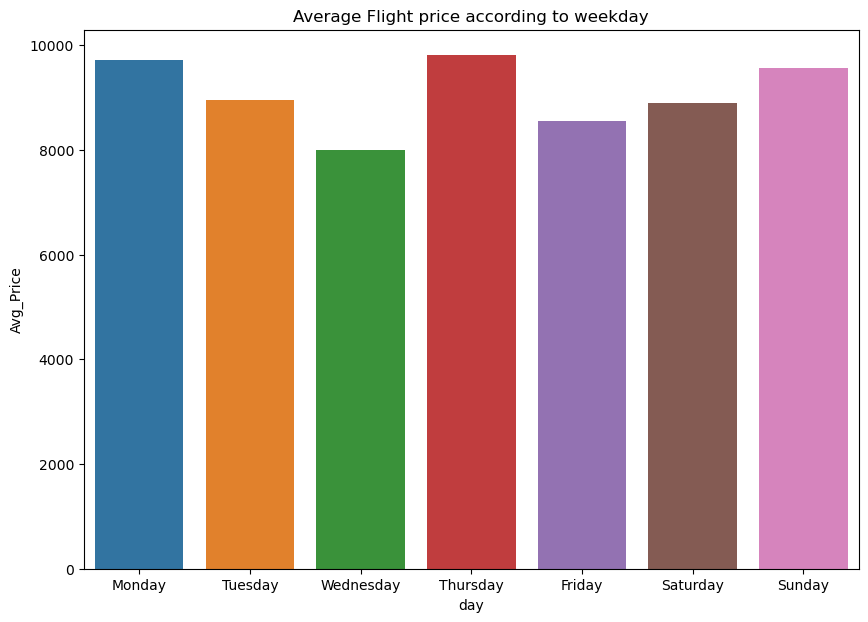

In [179]:
month_mapping = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

data = list(zip(b, month_mapping))

df1 = pd.DataFrame(data, columns=['Avg_Price', 'day'])

plt.figure(figsize=(10,7))
sns.barplot(x='day',y='Avg_Price',data=df1)
plt.title('Average Flight price according to weekday')
plt.show()

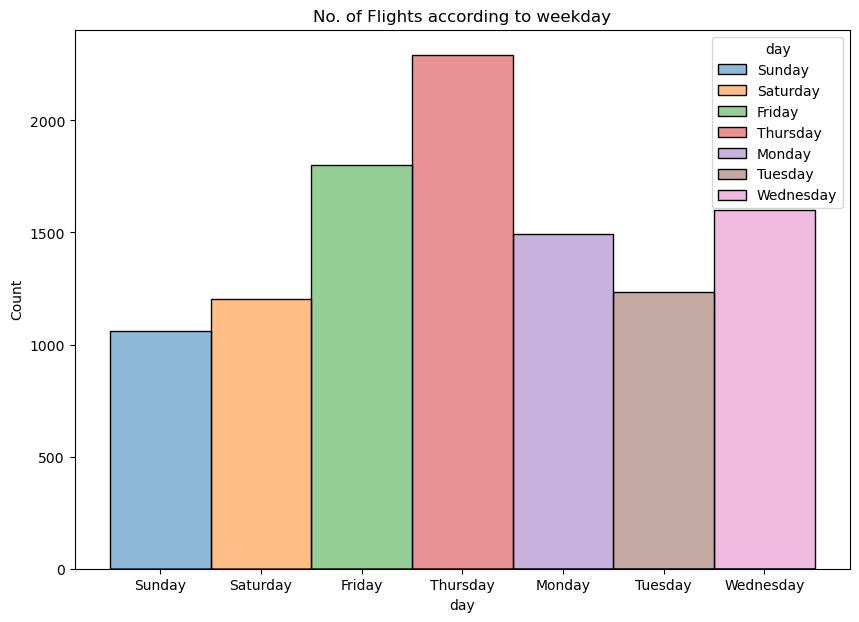

In [180]:
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day'] = df['day'].map(day_mapping)
plt.figure(figsize=(10,7))
sns.histplot(x='day',data=df,hue='day')
plt.title('No. of Flights according to weekday')
plt.show()

Insights:
- The average flight price is high in Thurdays compared to otherdays as flights in Thursdays are more.
- The average flight price is second highest in monday though flights on that day are not as much as on Thurday,Friday and wednesday.
- Lowest flight prices are on wednesdays though total flights are third highest the same day.

In [310]:
g= [len(route.split('→'))-1 for route in df['Route']]
df_r=pd.DataFrame(g,columns=['Total_stops'])
concat=pd.concat([df,df_r],axis=1)

In [312]:
concat.drop(['Route_l','Route_tot','Total_Stops'],axis=1,inplace=True)

In [328]:
import numpy as np
a = [0,1,2,3,4,5]
b=[]

for i in a:
    x = [j for idx, j in enumerate(concat['Price']) if concat['Total_stops'][idx] == i]
    y=np.mean(x)
    b.append(y)

    # Print the extracted prices for each month
    print(f"Average for day {i}: {y}")

Average for day 0: 7480.0
Average for day 1: 5024.900315095961
Average for day 2: 10594.123555555556
Average for day 3: 12715.807894736841
Average for day 4: 13112.0
Average for day 5: 17686.0


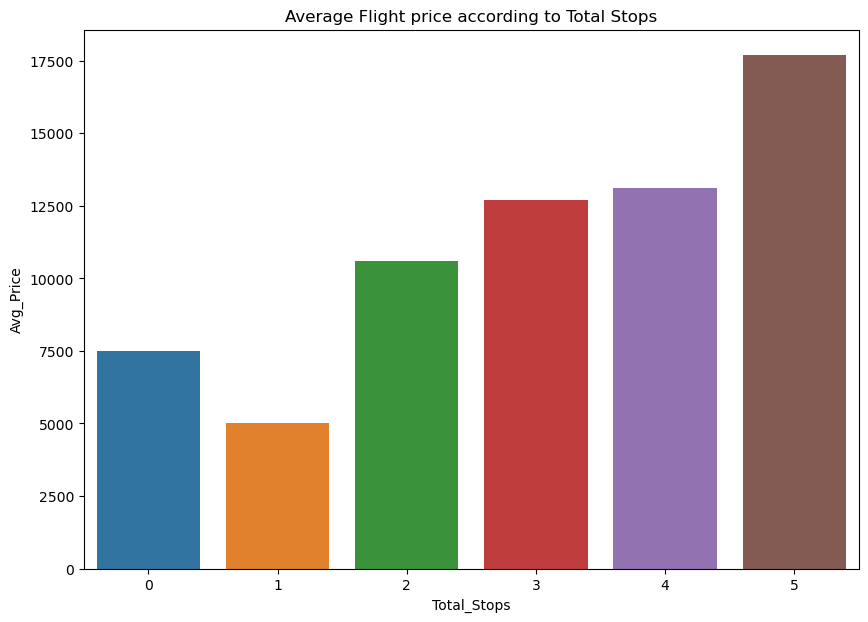

In [330]:
data = list(zip(b, a))

df1 = pd.DataFrame(data, columns=['Avg_Price', 'Total_Stops'])

plt.figure(figsize=(10,7))
sns.barplot(x='Total_Stops',y='Avg_Price',data=df1)
plt.title('Average Flight price according to Total Stops')
plt.show()

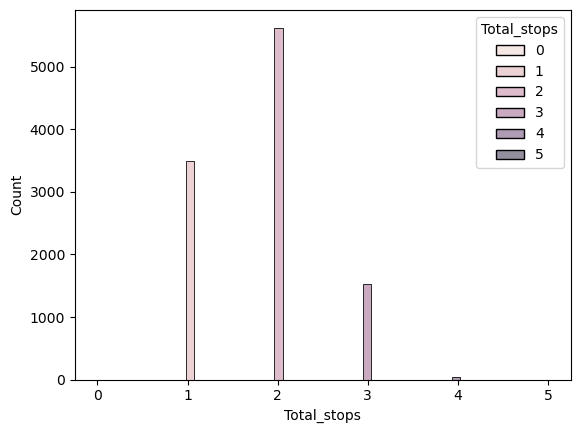

In [341]:
sns.histplot(x='Total_stops',data=concat,hue='Total_stops')
plt.show()

Insights:
- Though average price of flights having 0 stops and 5 stops seem to be high only one flight each are boarded in that category.
- Most people tend to board flight with 2 stops, still their average price is relatively low.
- Lowest average price is of flights with 1 stop.

In [331]:
import numpy as np
a = [3, 4,5,6]
b=[]

for i in a:
    x = [j for idx, j in enumerate(df['Price']) if df['Month'][idx] == i]
    y=np.mean(x)
    b.append(y)

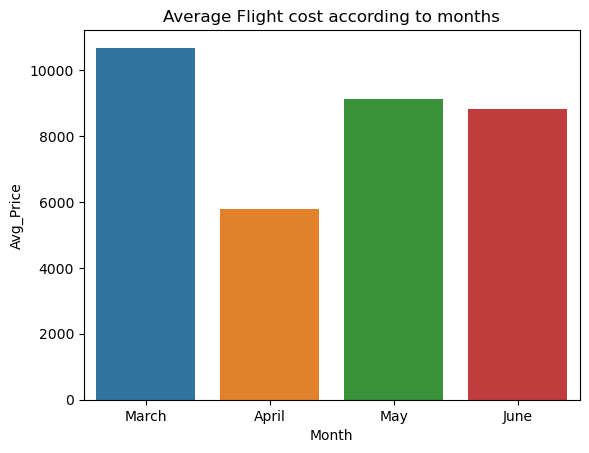

In [332]:
month_mapping=['March','April','May','June']
data = list(zip(b, month_mapping))

df1 = pd.DataFrame(data, columns=['Avg_Price', 'Month'])

sns.barplot(x='Month',y='Avg_Price',data=df1)
plt.title('Average Flight cost according to months')
plt.show()

Insight:
- The average flight price peaks in March followed by May, June and April.

In [337]:
df['Dep_Time_hr']=df['Dep_Time'].str.split(':').str[0].astype(int)

In [348]:
len(df['Dep_Time_hr'].unique())

24

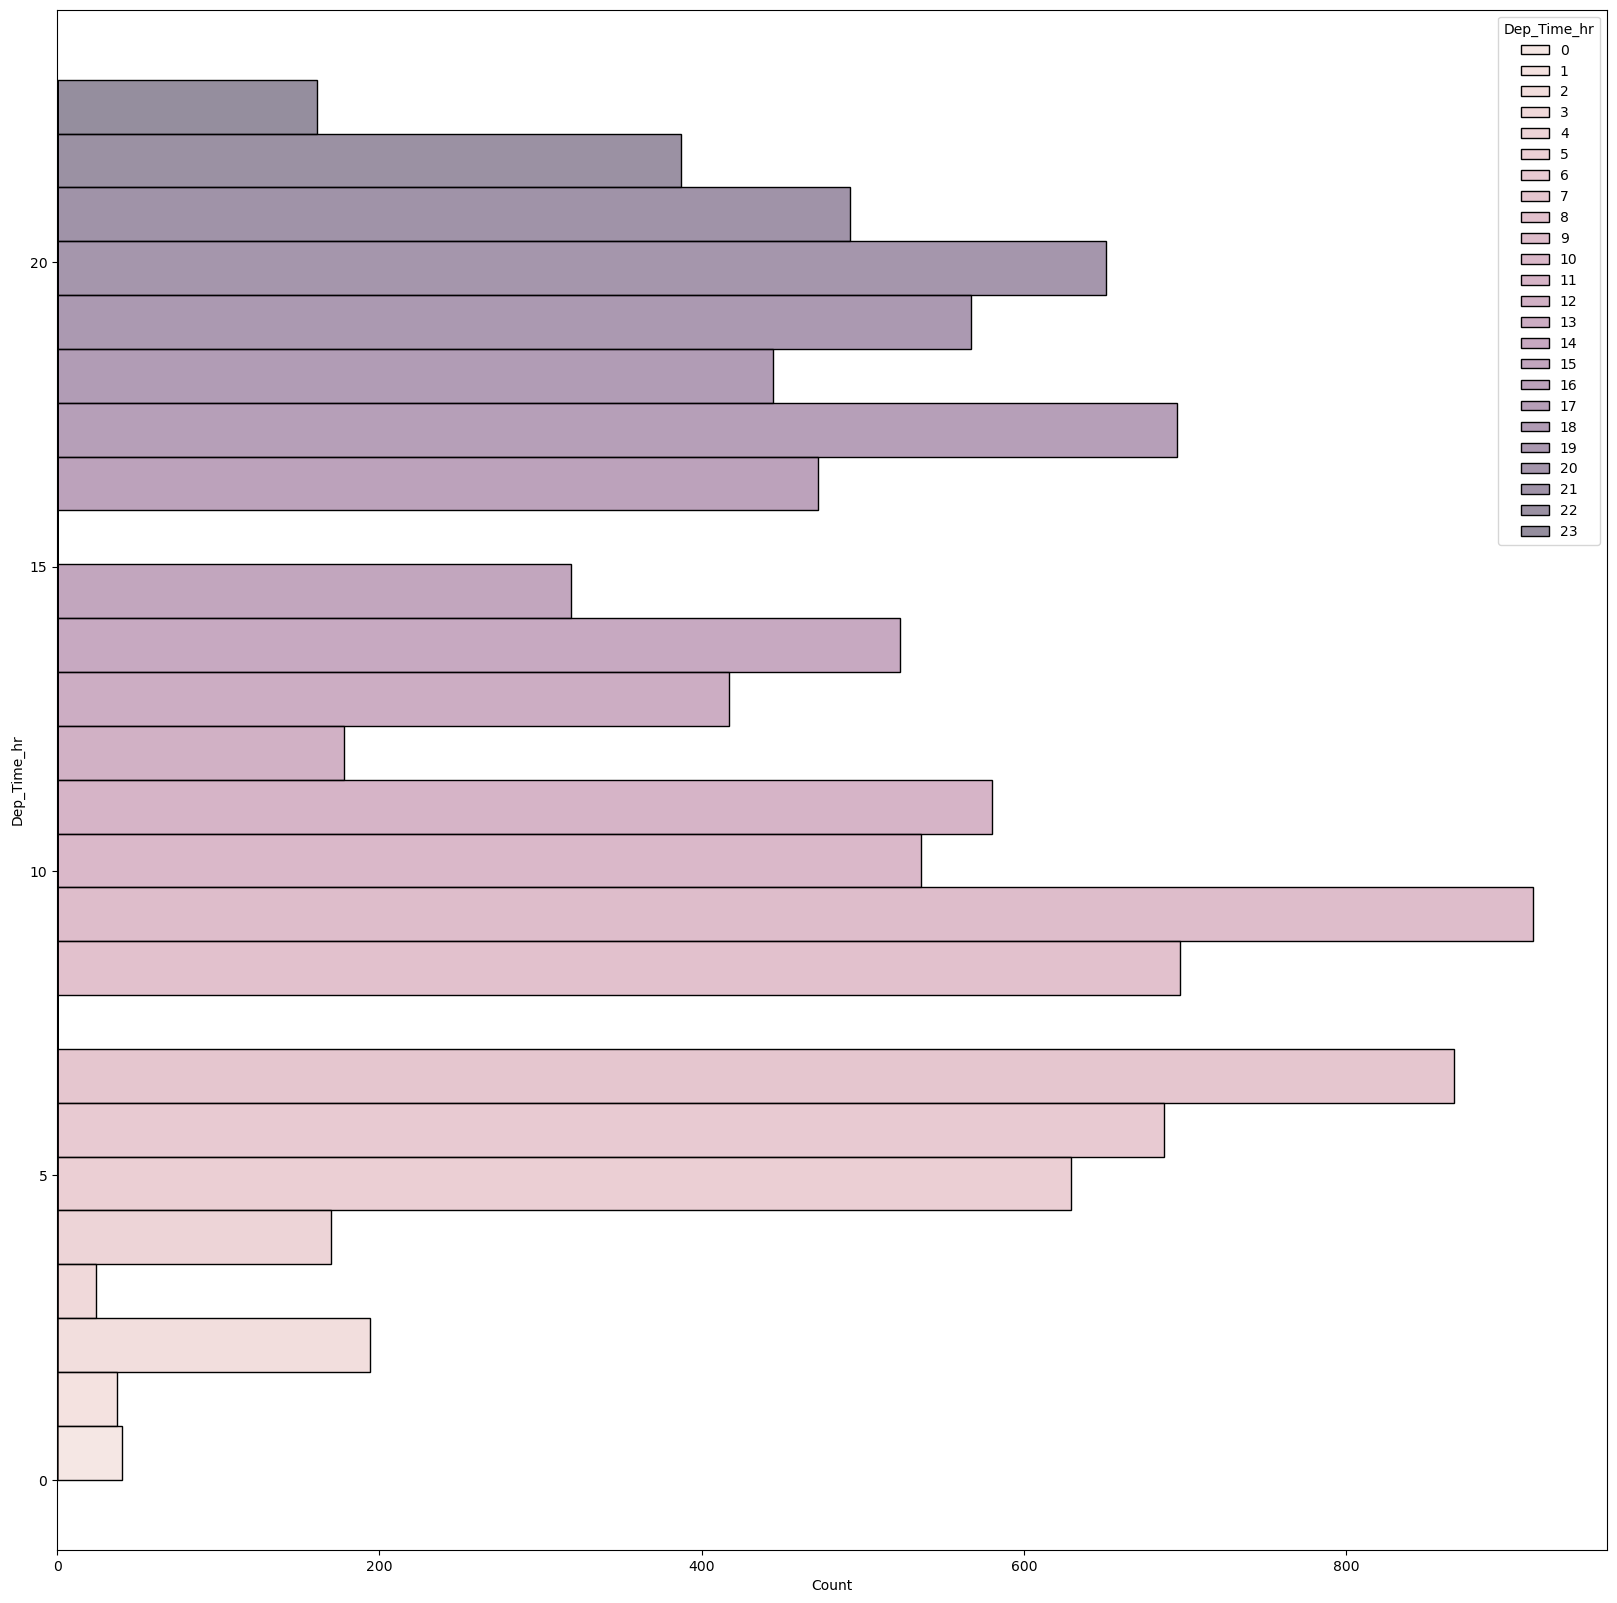

In [351]:
plt.figure(figsize=(20,20))
sns.histplot(y='Dep_Time_hr',data=df,hue='Dep_Time_hr')
plt.show()

In [359]:
import numpy as np
a = list(df['Dep_Time_hr'].unique())
a.sort()
b=[]

for i in a:
    x = [j for idx, j in enumerate(df['Price']) if df['Dep_Time_hr'][idx] == i]
    y=np.mean(x)
    b.append(y)

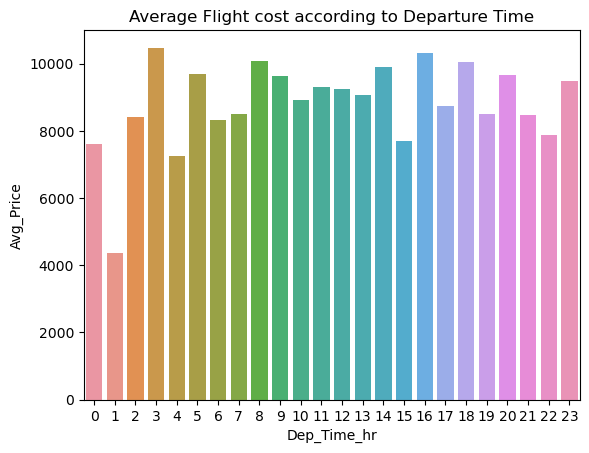

In [363]:
data = list(zip(b,a))

df1 = pd.DataFrame(data, columns=['Avg_Price', 'Dep_Time_hr'])

sns.barplot(x='Dep_Time_hr',y='Avg_Price',data=df1)
plt.title('Average Flight cost according to Departure Time')
plt.show()

Insights:
- The rush hours seem to be 7 AM to 10 AM and 3 PM. Average price also seem to be high in these hours.
- The highest average price is of flights at 3 AM and Lowest at 1 AM, though both hours are not rush hours.